In [2]:
import pandas as pd
from pathlib import Path
# import matplotlib_venn
import scanpy as sc
import stlearn as st
import anndata as ad
import seaborn as sns
from matplotlib import pyplot as plt

In [38]:
# Wiener
BASE_PATH = Path("/scratch/imb/Xiao/")

In [ ]:
# Bunya
BASE_PATH = Path("/scratch/project_mnt/S0010/Xiao")

In [61]:
df = pd.DataFrame()
for file in (BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_tile_size_bunya").rglob("stimage_tile_size_*/stimage_cor*.csv"):
    # print(file)
    df = pd.concat([df, pd.read_csv(file, index_col=0)], axis=1)
df = df.T
df["Pearson correlation"] = df["Pearson correlation"].astype(float)
df["Tile_size"] = df["Tile_size"].astype(int)

In [62]:
# df = pd.DataFrame()
# for file in (BASE_PATH / "Q1851/Xiao/Wiener_backup/STimage_exp/stimage_tile_size").rglob("stimage_tile_size_*/stimage_cor*.csv"):
#     # print(file)
#     df = pd.concat([df, pd.read_csv(file, index_col=0)], axis=0)

In [71]:
df[df["Tile_size"] == 299]

,Gene,Pearson correlation,Slide,Method,Tile_size
0,ISG15,-0.014104,FFPE,STimage,299
1,TNFRSF18,-0.023295,FFPE,STimage,299
2,TNFRSF4,-0.131900,FFPE,STimage,299
3,CALML6,-0.057468,FFPE,STimage,299
4,HES5,-0.032661,FFPE,STimage,299
...,...,...,...,...,...
1517,ETS2,0.011108,1160920F,STimage,299
1518,MX1,-0.054176,1160920F,STimage,299
1519,TMPRSS2,-0.046214,1160920F,STimage,299
1520,ITGB2,0.060362,1160920F,STimage,299


<AxesSubplot:xlabel='Tile_size', ylabel='Pearson correlation'>

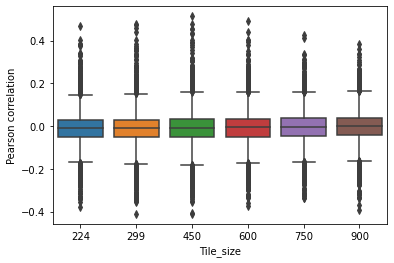

In [64]:
# sns.boxplot(x="Slide", y="Pearson correlation",hue="Tile_size", data=df)
sns.boxplot(x="Tile_size", y="Pearson correlation", data=df)

In [72]:
top_300gene = df[df["Tile_size"] == 299].groupby("Gene")["Pearson correlation"].mean().sort_values(ascending=False)[0:300].index
for i in top_300gene:
    print(i)

PROM1
AFDN
RAD21
CUL1
SRSF2
GRB2
RORC
TCF7L1
MIF
CFB
LAMP2
RPN2
ZFP36L1
SDHA
HMGA1
PDIA4
DHX9
NBN
ANXA2
SPOCK2
DDIT4
TFDP1
PCNA
MCM4
XIAP
TFRC
PRKAR2A
CD63
ARID1A
PSMD7
PIK3R3
FOXA1
NSD3
APP
IRAK1
USP1
LCN2
MCL1
CD9
IRF3
RAC1
ELF3
HRAS
C1R
MAPK8IP1
CCNB1
CCL14
HLA-F
CD55
MGST1
PYCARD
KMT2D
STAT2
GPI
DDX3X
PLCG2
NOTCH2
PSEN2
ITGB8
KRAS
TNC
ERCC3
IL10RB
ENDOG
C3
HSP90B1
ITGAE
TREM2
ETV7
USP9X
SPP1
CEACAM1
SAA1
RELA
IL13RA1
IFIH1
ATM
ADGRA2
SELPLG
MAPK8
MAPK1
STAT1
DEFB1
OAS1
TAF1
CDC20
RFC3
EZH2
XBP1
IKBKB
EIF4EBP1
MAPKAPK2
SOX10
MYC
STAT3
PSMD2
BCR
CYFIP2
CXCL16
ETV6
FUBP1
GLG1
CXCL9
MMP7
OAS3
DNMT1
EGF
IER3
CCR7
ITGA4
NF2
LAG3
ERCC1
ITGB6
TFEB
GNG7
PDIA6
PPP2R2A
DUSP8
BARD1
SP100
DTL
CD27
CST7
KDM6A
PIK3CB
CDH1
GREM1
TLX1
FANCA
GZMB
CD79A
RGS1
NSD1
DTX3
NFKB1
HDAC11
RIPK2
LRRC32
CXCR4
JAG1
TNFRSF25
MYB
DUSP1
LRBA
CLEC7A
BST2
KAT6A
GNLY
MR1
F13A1
CCR1
CD47
GNAI2
RAD50
IRAK4
PRKCI
ITK
VSIR
CCL20
CARD11
LILRB1
LAT
TET2
IGHM
LILRA4
MMP12
PDGFRB
VEGFB
CCL5
CREBBP
NFE2L2
CTNND1
FOXO3
FADD
CD

In [82]:
top_100gene = df[df["Tile_size"] == 299].groupby("Gene")["Pearson correlation"].mean().sort_values(ascending=False)[0:100].index
df_top100 = df[df["Gene"].isin(top_100gene)]

In [84]:
import pickle
with open("top100gene_tile_size.pickle", "wb") as f:
    pickle.dump(top_100gene, f)

(0.0, 1.0)

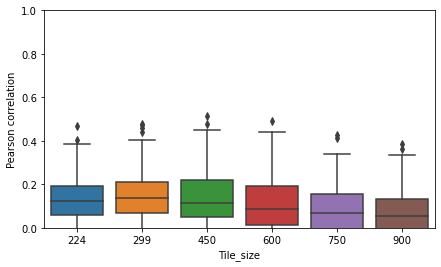

In [85]:
ax, fig = plt.subplots(figsize=(7,4))
sns.boxplot(x="Tile_size", y="Pearson correlation", data=df_top100)
plt.ylim(0,1)